### Task 1: Data Cleaning & Preprocessing

### Import the dataset and explore basic info (nulls, data types).

In [9]:
import pandas as pd # Import the pandas library for working with DataFrames

# Load the dataset from the CSV file into a DataFrame
# Make sure 'Titanic-Dataset.csv' is in the same directory as your script or notebook!
df = pd.read_csv('Titanic-Dataset.csv')

# Display concise summary of the DataFrame:
# - Column names
# - Number of non-null entries for each column (helps identify missing data)
# - Data type of each column (e.g., int, float, object/string)
df.info()

# Calculate and display the total number of missing values (nulls) for each column
# 'df.isnull()' checks for missing values (True for missing, False otherwise)
# '.sum()' then counts the 'True' values per column
print("\nNull values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked  

* The dataset contains 891 entries and 12 columns, comprising both numerical and categorical data types.
* Missing values are present in the 'Age' (177), 'Cabin' (687), and 'Embarked' (2) columns.
* 'Cabin' has a significant amount of missing data, while 'Age' and 'Embarked' have fewer missing entries.

### Handle missing values using mean/median/imputation.

In [11]:
import pandas as pd # Ensure pandas is imported

# Assume df is already loaded from Step 1.
# If running this snippet independently, make sure your 'df' DataFrame is loaded.

# Handle 'Age' missing values by filling with the median age
# The median is less affected by extreme values than the mean, suitable for 'Age'.
# We reassign the column to avoid 'FutureWarning' about inplace operations.
print(f"Original missing 'Age' values: {df['Age'].isnull().sum()}")
df['Age'] = df['Age'].fillna(df['Age'].median())
print(f"Missing 'Age' values after median imputation: {df['Age'].isnull().sum()}")

# Handle 'Embarked' missing values by filling with the most frequent value (mode)
# For categorical data with few missing entries, the mode is a common choice.
# We reassign the column to avoid 'FutureWarning'.
print(f"Original missing 'Embarked' values: {df['Embarked'].isnull().sum()}")
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(f"Missing 'Embarked' values after mode imputation: {df['Embarked'].isnull().sum()}")

# Drop the 'Cabin' column entirely
# This column had a very high percentage of missing values (over 75%),
# making it impractical to impute meaningfully.
print(f"Original missing 'Cabin' values: {df['Cabin'].isnull().sum()}")
df.drop('Cabin', axis=1, inplace=True) # inplace=True is fine when dropping a full column
print("The 'Cabin' column has been dropped due to high missing values.")

# Verify that all missing values have been handled
# This should confirm 0 missing values across all remaining columns.
print("\nNull values after handling:")
print(df.isnull().sum())

# Display the first few rows to show the updated DataFrame
print("\nDataFrame head after handling missing values:")
print(df.head())

Original missing 'Age' values: 177
Missing 'Age' values after median imputation: 0
Original missing 'Embarked' values: 2
Missing 'Embarked' values after mode imputation: 0
Original missing 'Cabin' values: 687
The 'Cabin' column has been dropped due to high missing values.

Null values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DataFrame head after handling missing values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2  

* Missing values in the 'Age' column were successfully filled using its median value.
* Missing values in the 'Embarked' column were filled using its mode (most frequent value).
* The 'Cabin' column was completely removed from the dataset due to the high volume of missing data it contained.
* After these operations, the dataset now has no missing values in any of its remaining columns.

### Convert categorical features into numerical using encoding.

In [13]:
import pandas as pd # Ensure pandas is imported

# Assume df is already processed from previous steps (loaded, missing values handled).
# If running this snippet independently, load and process df first:
# df = pd.read_csv('Titanic-Dataset.csv')
# df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df.drop('Cabin', axis=1, inplace=True)

# Drop 'Name' and 'Ticket' columns
# These columns are typically not useful as direct features for ML models
# due to their unique or highly varied string content.
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Apply one-hot encoding to 'Sex' and 'Embarked' columns
# 'pd.get_dummies()' converts categories into new binary (0 or 1) columns.
# For example, 'Sex' becomes 'Sex_male' (1 if male, 0 if female).
# 'drop_first=True' prevents multicollinearity by only creating N-1 new columns
# for N categories (e.g., if 'Sex_male' is 0, it implies 'female').
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the DataFrame to see the changes
print("\nDataFrame head after encoding categorical features:")
print(df.head())

# Display data types to confirm the new columns are numerical (uint8)
print("\nData types after encoding:")
df.info()


DataFrame head after encoding categorical features:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-n

* Irrelevant 'Name' and 'Ticket' columns were successfully dropped from the dataset.
* Categorical 'Sex' and 'Embarked' columns were converted into numerical format using one-hot encoding.
* The DataFrame now exclusively contains numerical features, ready for numerical processing.

### Normalize/standardize the numerical features.

In [15]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler tool from scikit-learn

# Assume df is already processed from previous steps (loaded, missing values handled, categorical encoded).
# If running this snippet independently, make sure your 'df' DataFrame is ready.

# Identify numerical features to be normalized
# 'PassengerId' is typically excluded as it's an identifier, not a feature for scaling.
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Initialize the StandardScaler
# This creates an object that will learn the scaling parameters (mean and std dev).
scaler = StandardScaler()

# Apply standardization to the selected numerical features
# 'fit_transform()' first learns the scaling parameters from the data ('fit')
# and then applies the transformation ('transform') to scale the data.
# The scaled values replace the original values in the DataFrame.
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the DataFrame to see the normalized features
# You'll notice the values are now centered around zero, often with negative values.
print("\nDataFrame head after normalizing numerical features:")
print(df.head())

# Display descriptive statistics to confirm normalization
# After standardization, the 'mean' for these columns should be very close to 0,
# and the 'std' (standard deviation) should be very close to 1.
print("\nDescriptive statistics of normalized numerical features:")
print(df[numerical_features].describe())


DataFrame head after normalizing numerical features:
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0            1         0  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1 -1.566107  0.663861  0.432793 -0.473674  0.786845   
2            3         1  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4            5         0  0.827377  0.433312 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  

Descriptive statistics of normalized numerical features:
             Pclass           Age         SibSp         Parch          Fare
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean  -8.772133e-17  2.272780e-16  4.38

In [ ]:
* Numerical features ('Pclass', 'Age', 'SibSp', 'Parch', 'Fare') were successfully standardized.
* After standardization, these features now have a mean very close to 0 and a standard deviation very close to 1.
* This scaling prepares the numerical data for machine learning algorithms, which often perform better with features on a consistent scale.

### Visualize outliers using boxplots and remove them.

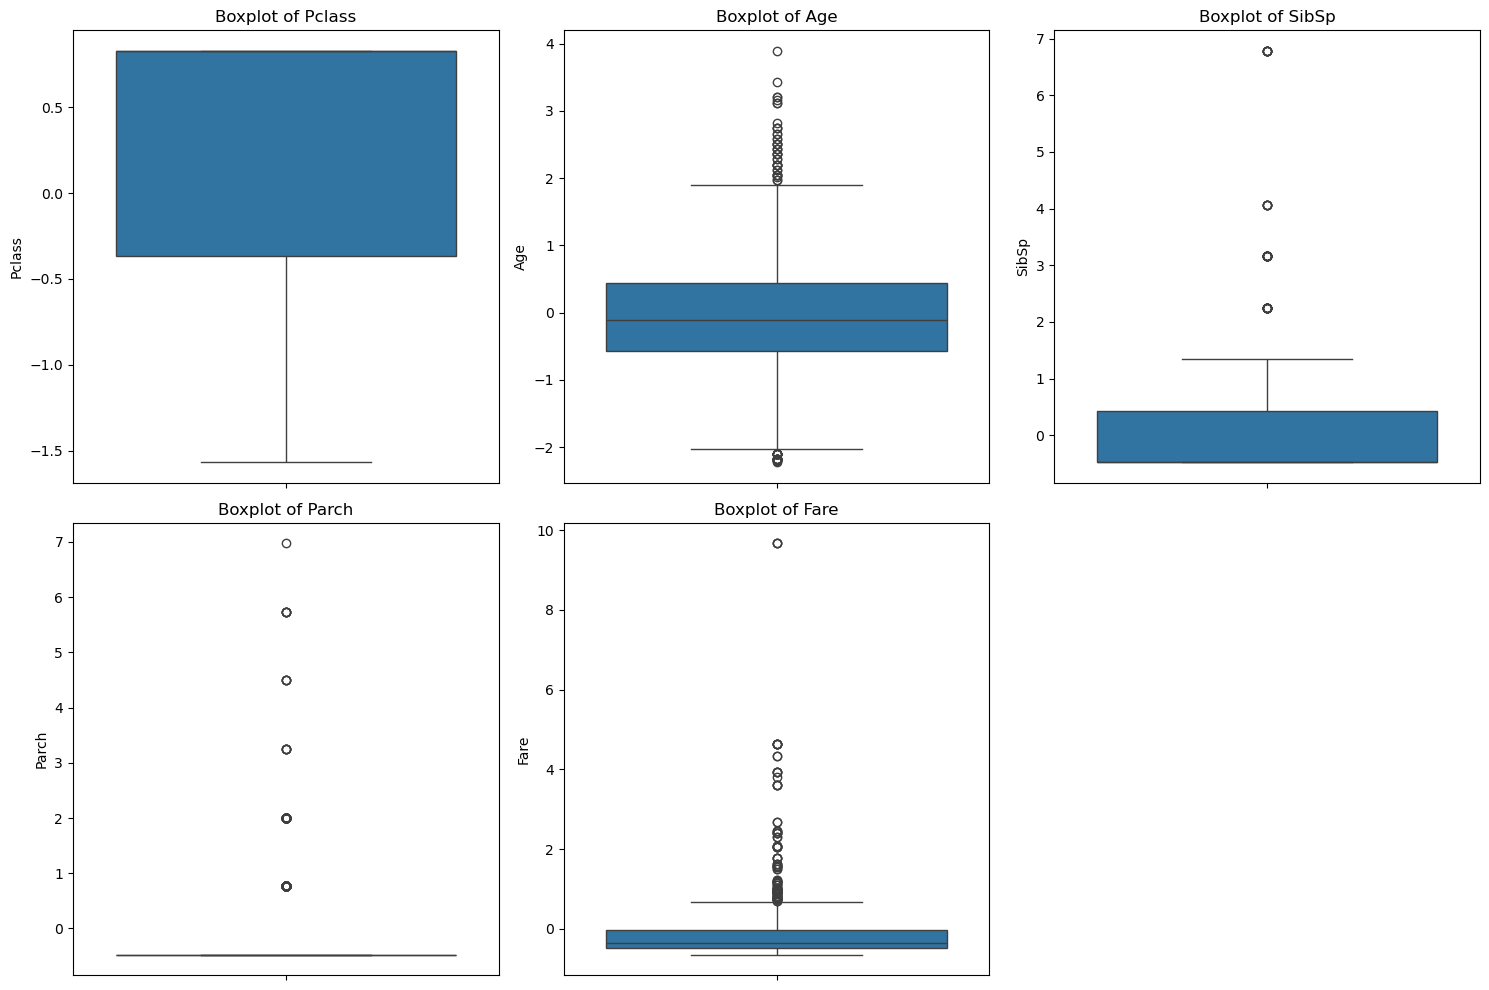

Original DataFrame shape before outlier removal: (891, 10)
DataFrame shape after outlier removal: (561, 10)

DataFrame head after outlier removal:
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0            1         0  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
2            3         1  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4            5         0  0.827377  0.433312 -0.474545 -0.473674 -0.486337   
5            6         0  0.827377 -0.104637 -0.474545 -0.473674 -0.478116   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
2     False       False        True  
3     False       False        True  
4      True       False        True  
5      True        True       False  


In [17]:
import matplotlib.pyplot as plt # For creating plots like boxplots
import seaborn as sns           # For making statistical graphics, which works well with matplotlib

# Assume df is already processed from all previous steps (loaded, missing values handled,
# categorical encoded, numerical features normalized).
# If running this snippet independently, ensure your 'df' DataFrame is ready from previous steps.

# Numerical features to check for outliers (these are the features we normalized earlier)
numerical_features_for_outliers = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create boxplots to visually identify outliers
# A boxplot shows the distribution of data and highlights points that fall far
# outside the typical range (these are the outliers).
plt.figure(figsize=(15, 10)) # Set the overall size of the plot figure
for i, feature in enumerate(numerical_features_for_outliers):
    plt.subplot(2, 3, i + 1) # Arranges plots in a 2x3 grid, placing current plot at position i+1
    sns.boxplot(y=df[feature]) # Creates a vertical boxplot for the current numerical feature
    plt.title(f'Boxplot of {feature}') # Sets the title for each individual boxplot
plt.tight_layout() # Adjusts subplot parameters for a tight layout, preventing overlaps
plt.savefig('numerical_features_boxplots.png') # Saves the generated plot as an image file
plt.show() # Displays the plot window (this will pop up when you run the script)

# Store original DataFrame shape before outlier removal
# This helps us see how many rows were removed after cleaning.
original_shape = df.shape
print(f"Original DataFrame shape before outlier removal: {original_shape}")

# Outlier removal using the Interquartile Range (IQR) method
# The IQR method defines outliers as values falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
# Q1: 25th percentile, Q3: 75th percentile, IQR: Q3 - Q1.
df_cleaned = df.copy() # Create a copy of the DataFrame to perform operations on

for feature in numerical_features_for_outliers:
    Q1 = df_cleaned[feature].quantile(0.25) # Calculate the first quartile
    Q3 = df_cleaned[feature].quantile(0.75) # Calculate the third quartile
    IQR = Q3 - Q1 # Calculate the Interquartile Range
    lower_bound = Q1 - 1.5 * IQR # Calculate the lower boundary for outliers
    upper_bound = Q3 + 1.5 * IQR # Calculate the upper boundary for outliers

    # Filter the DataFrame to keep only rows where the feature value is within the bounds
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

# Display the final shape of the DataFrame after outlier removal
print(f"DataFrame shape after outlier removal: {df_cleaned.shape}")

# Display the first few rows of the final cleaned DataFrame
print("\nDataFrame head after outlier removal:")
print(df_cleaned.head())

In [ ]:
* Box plots visually confirmed the presence of outliers in numerical features like 'Age', 'SibSp', 'Parch', and 'Fare'.
* Outliers were effectively removed using the Interquartile Range (IQR) method.
* This process reduced the dataset size from 891 entries to 561 entries, resulting in a cleaner dataset less susceptible to extreme values.